In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#from IPython.display import Image
import numpy as np

# Example 10.12

In [2]:
def e_ink(i,n,k):
    s2 = i + n + k
    s = (i + n + k)/2
    if np.mod(s2,2)==1:
        f = 0
    elif ((s<i) | (s<n) | (s<k)):
        f = 0
    else:
        f = np.math.factorial(i)*np.math.factorial(n)*np.math.factorial(k)/np.math.factorial(s-i)/np.math.factorial(s-n)/np.math.factorial(s-k)
    return f

In [113]:
K = 6
abar = 2
sigma_a = 0.25
J = 20
h = 2/J
xj = -1 + np.arange(1,J)*h

In [76]:
f = np.zeros(J-1)
rhs = np.zeros((K+1,J-1))

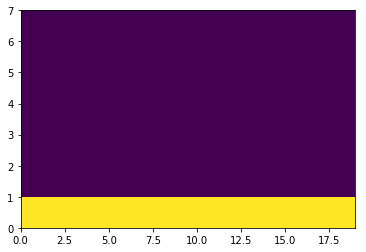

In [80]:
for ll in range(1, J):
    f[ll-1] = h
    for ii in range(0,K+1):
        rhs[ii,ll-1] = f[ll-1]*(ii==0)
plt.pcolor(rhs)

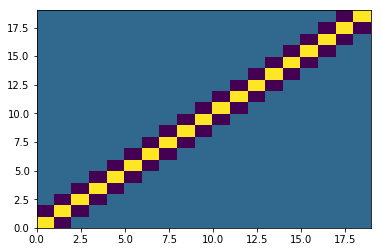

In [81]:
Phi = np.zeros((J-1,J-1))
for jj in range(1,J):
    for ll in range(1,J):
        Phi[jj-1,ll-1] = ( 2*(jj==ll) -1*(jj==(ll-1)) -1*(jj==(ll+1)) )/h;
plt.pcolor(Phi)

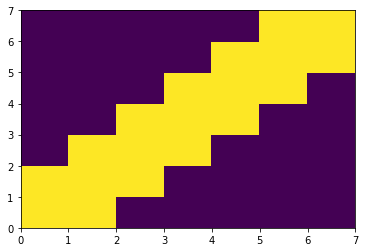

In [82]:
term = np.zeros((K+1,K+1))
for kk in range(0,K+1):
    for ii in range(0,K+1):
        term[kk,ii] = abar*e_ink(0,kk,ii) + sigma_a*e_ink(1,kk,ii);
plt.pcolor(term>0)

In [83]:
AAA = np.zeros((J-1,K+1,J-1,K+1))
AAA = np.zeros((K+1,J-1,K+1,J-1,))
for ll in range(1,J):
    for ii in range (0,K+1):
        for jj in range (1,J):
            for kk in range(0,K+1):
                AAA[kk,jj-1,ii,ll-1] = Phi[jj-1,ll-1]*term[kk,ii]
AAA=AAA.reshape(((J-1)*(K+1),(J-1)*(K+1)))

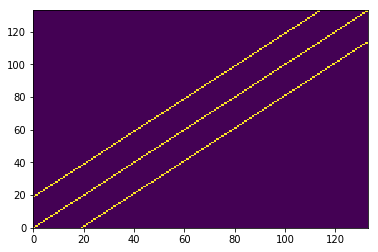

In [84]:
plt.pcolor(AAA>0)

In [88]:
from numpy.linalg import inv
g=np.dot(inv(AAA),rhs.reshape((J-1)*(K+1)))
g=g.reshape((K+1,J-1))

In [104]:
M = g[0,:]
gamma = np.zeros(K+1)
for i in range(K+1):
    gamma[i] = np.math.factorial(i)
gamma=gamma.reshape(K+1,1)
v = np.sum(gamma[1:]*g[1:,:]**2,axis=0)
v.shape

(19,)

In [120]:
a = np.random.normal(abar,sigma_a,100)
xj = xj.reshape(J-1,1)
trajectories = -1./a/2*(xj-1)*(xj+1)

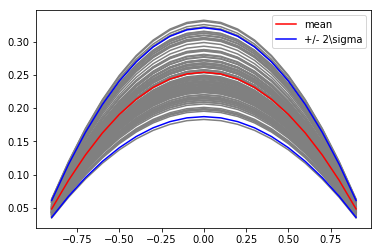

In [127]:
plt.plot(xj,trajectories,color='gray')
plt.plot(xj,M,color='red',label='mean')
plt.plot(xj,M + 2*np.sqrt(v),color='blue',label='+/- 2\sigma')
plt.plot(xj,M - 2*np.sqrt(v),color='blue')
plt.legend(loc="upper right")